<a href="https://colab.research.google.com/github/Yang-Hyeon-Seo/IT-Business-2022/blob/main/classification_2020medicalcheckup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

mglearn이 import가 안돼서 앞부분에서 실행

In [1]:
!pip install mglearn 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install --upgrade joblib==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import mglearn

In [4]:
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt

%matplotlib inline

In [7]:
#한글 깨지는 것 해결
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

In [5]:
plt.rc('font', family='NanumBarunGothic') 

# 간 건강으로 당뇨 여부를 예측할 수 있을까?

## 당뇨
당뇨병은 높은 혈당 수치가 오랜 기간 지속되는 대사 질환이다.  
> ### 혈당이 높을 때의 몸의 반응
혈당이 정상보다 높아지면 이자(췌장)에서 인슐린이 분비되고, 인슐린은 간에서 포도당을 글리코젠으로 저장하도록 촉진한다

> ### 혈당이 낮을 때의 몸의 반응
혈당이 정상보다 낮아지면 이자(췌장)에서 글루카곤이 분비되고, 글루카곤은 간에서 글리코젠을 분해하도록 한다.

당뇨병은 췌장이 충분한 인슐린을 만들어 내지 못하거나 몸의 세포가 만들어진 인슐린에 적절하게 반응하지 못하는 것이 원인이 된다. 

2014년 기준으로, 세계적으로 약 3억 8천 명의 당뇨병 환자가 존재하며, 2035년에 5억 9천만명까지 증가할 것으로 예측된다.  
2012년부터 2014년까지, 매년 당뇨병으로 사망한 사람은 150만에서 490만에 이르는 것으로 추정되었다.


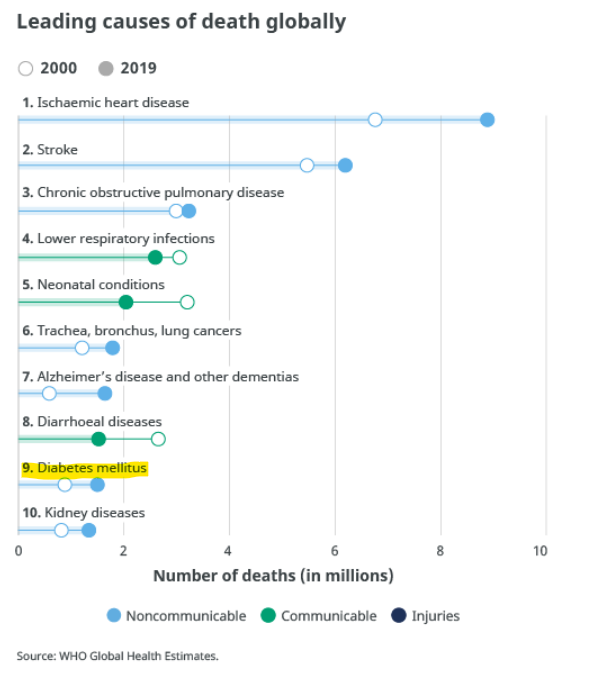

WHO(World Health Organization)에 따르면 당뇨병은 2000년 이후 70%의 상당한 비율 증가에 이어 사망 원인 상위 10위에 진입했다.

당뇨병의 주 원인인 혈당을 관리하기 위해선 췌장에서 호르몬을 분비해야 하지만, 이 호르몬이 실제로 작용하는 곳은 간이다.  
따라서 간 건강 수치를 통해 당뇨병 여부를 분류해보려고 한다.

## 데이터 전처리
1. 데이터 파일을 가지고 온다
2. 종속변수와 독립변수를 정한 후, 변수에 NULL값이 있는 사례를 제외한다
3. 공복혈당이 당뇨병 진단 기준을 넘는 경우를 당뇨병(1), 넘지 않는 경우를 정상(0)으로 표현하는 종속변수를 새롭게 만든다. 또, 체중이 당뇨에 영향을 미치기 때문에 일단 BMI를 계산한 BMI 열을 추가로 만든다



In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import pandas as pd

# health data 데이터 가져오기
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/IT-Business/health_data.csv")

#데이터 확인
display(data.head()) 
print(data.info())  

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준년도         10000 non-null  int64  
 1   가입자일련번호      10000 non-null  int64  
 2   시도코드         10000 non-null  int64  
 3   성별코드         10000 non-null  object 
 4   연령대코드(5세단위)  10000 non-null  int64  
 5   신장(5Cm단위)    10000 non-null  int64  
 6   체중(5Kg 단위)   10000 non-null  int64  
 7   허리둘레         10000 non-null  float64
 8   시력(좌)        10000 non-null  float64
 9   시력(우)        10000 non-null  float64
 10  청력(좌)        10000 non-null  int64  
 11  청력(우)        10000 non-null  int64  
 12  수축기혈압        9912 non-null   float64
 13  이완기혈압        9912 non-null   float64
 14  식전혈당(공복혈당)   9912 non-null   float64
 15  총콜레스테롤       4044 non-null   float64
 16  트리글리세라이드     4044 non-null   float64
 17  HDL콜레스테롤     4044 non-null   float64
 18  LDL콜레스테롤     3977 non-null   float64
 19  혈색소  

* 종속변수 : 당뇨 여부 - 식전혈당(공복혈당) 값이 당뇨병 기준인 125를 기준으로 식전혈당 < 125라면 0, 식전혈당 >= 125라면 1값을 갖는 새로운 변수(Diabetes)를 만든다  
* 독립변수 : 성별코드, 연령대코드, BMI(신장과 체중을 바탕으로 BMI라는 새로운 변수를 만든다, BMI = 체중/(신장x0.01)^2 ), (혈청지오티)AST, (혈청지오티)ALT, 감마지티피, 흡연상태, 음주여부

독립변수에 NULL이 포함된 사례를 모두 제거한다

In [8]:
#원본 데이터를 직접 수정하지 않기 위해 데이터 프레임을 복사한다
df = data.copy()

In [9]:
print(df.isnull().sum())  #결측치 확인

기준년도              0
가입자일련번호           0
시도코드              0
성별코드              0
연령대코드(5세단위)       0
신장(5Cm단위)         0
체중(5Kg 단위)        0
허리둘레              0
시력(좌)             0
시력(우)             0
청력(좌)             0
청력(우)             0
수축기혈압            88
이완기혈압            88
식전혈당(공복혈당)       88
총콜레스테롤         5956
트리글리세라이드       5956
HDL콜레스테롤       5956
LDL콜레스테롤       6023
혈색소              88
요단백             139
혈청크레아티닌          88
(혈청지오티)AST       88
(혈청지오티)ALT       88
감마지티피            88
흡연상태              2
음주여부              1
구강검진수검여부          0
치아우식증유무        6749
치석             6749
데이터공개일자           0
dtype: int64


In [10]:
#각 종속 변수의 결측치를 제거한다
df = df.dropna(subset = ['식전혈당(공복혈당)'], axis=0)
df = df.dropna(subset = ['(혈청지오티)AST'], axis=0)
df = df.dropna(subset = ['(혈청지오티)ALT'], axis=0)
df = df.dropna(subset = ['감마지티피'], axis=0)
df = df.dropna(subset = ['흡연상태'], axis=0)
df = df.dropna(subset = ['음주여부'], axis=0)

In [11]:
print(df.isnull().sum())  #결측치 확인

기준년도              0
가입자일련번호           0
시도코드              0
성별코드              0
연령대코드(5세단위)       0
신장(5Cm단위)         0
체중(5Kg 단위)        0
허리둘레              0
시력(좌)             0
시력(우)             0
청력(좌)             0
청력(우)             0
수축기혈압             0
이완기혈압             0
식전혈당(공복혈당)        0
총콜레스테롤         5866
트리글리세라이드       5866
HDL콜레스테롤       5866
LDL콜레스테롤       5933
혈색소               0
요단백              51
혈청크레아티닌           0
(혈청지오티)AST        0
(혈청지오티)ALT        0
감마지티피             0
흡연상태              0
음주여부              0
구강검진수검여부          0
치아우식증유무        6658
치석             6658
데이터공개일자           0
dtype: int64


In [12]:
print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9909 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준년도         9909 non-null   int64  
 1   가입자일련번호      9909 non-null   int64  
 2   시도코드         9909 non-null   int64  
 3   성별코드         9909 non-null   object 
 4   연령대코드(5세단위)  9909 non-null   int64  
 5   신장(5Cm단위)    9909 non-null   int64  
 6   체중(5Kg 단위)   9909 non-null   int64  
 7   허리둘레         9909 non-null   float64
 8   시력(좌)        9909 non-null   float64
 9   시력(우)        9909 non-null   float64
 10  청력(좌)        9909 non-null   int64  
 11  청력(우)        9909 non-null   int64  
 12  수축기혈압        9909 non-null   float64
 13  이완기혈압        9909 non-null   float64
 14  식전혈당(공복혈당)   9909 non-null   float64
 15  총콜레스테롤       4043 non-null   float64
 16  트리글리세라이드     4043 non-null   float64
 17  HDL콜레스테롤     4043 non-null   float64
 18  LDL콜레스테롤     3976 non-null   float64
 19  혈색소   

In [13]:
print("결측치 제거한 데이터 프레임 :", df.shape)
print("원본 데이터 프레임 :", data.shape)

결측치 제거한 데이터 프레임 : (9909, 31)
원본 데이터 프레임 : (10000, 31)


Diabetes변수와 BMI변수를 새로 만든다

In [14]:
#Diabetes
df['diabetes'] = [1 if s >= 125 else 0 for s in df['식전혈당(공복혈당)']] 

In [15]:
def changeBMI(weight, height):
  return weight/(height/100)**2

In [16]:
print(changeBMI(60, 165))

22.03856749311295


In [17]:
#print(df.BMI[0])

In [18]:
print(df.shape[0])

9909


In [19]:
print(df['체중(5Kg 단위)'][3])

70


In [20]:
#df = df.drop('BMI', axis=1)

In [21]:
#BMI
BMI = changeBMI(df['체중(5Kg 단위)'], df['신장(5Cm단위)']) #원하는 데이터 형태가 나온다

print(BMI)
print(df)
#체중과 신장에서 함께 돌아가도록 해야지, 아니면 체중에 대해 신장 모두 계산하고 그걸 반복하게 될 것임
df['BMI'] = BMI



0       22.038567
1       28.888889
2       22.892820
3       27.343750
4       20.811655
          ...    
9995    22.892820
9996    21.484375
9997    31.250000
9998    22.892820
9999    29.296875
Length: 9909, dtype: float64
      기준년도  가입자일련번호  시도코드 성별코드  연령대코드(5세단위)  신장(5Cm단위)  체중(5Kg 단위)   허리둘레  \
0     2020        1    36    M            9        165          60   72.1   
1     2020        2    27    F           13        150          65   81.0   
2     2020        3    11    F           12        155          55   70.0   
3     2020        4    31    M           13        160          70   90.8   
4     2020        5    41    F           12        155          50   75.2   
...    ...      ...   ...  ...          ...        ...         ...    ...   
9995  2020     9996    44    F           13        155          55   83.0   
9996  2020     9997    43    F           11        160          55   77.5   
9997  2020     9998    45    M           12        160          80   93.0   
999

In [22]:
display(df.head(20))

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자,diabetes,BMI
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,...,27.0,21.0,No,No,0,NaN,NaN,12/29/2021,0,22.038567
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,...,15.0,15.0,No,No,0,NaN,NaN,12/29/2021,0,28.888889
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,...,25.0,7.0,No,No,0,NaN,NaN,12/29/2021,0,22.892820
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,...,97.0,72.0,No,No,1,0.0,0.0,12/29/2021,1,27.343750
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,...,17.0,14.0,No,No,0,NaN,NaN,12/29/2021,0,20.811655
5,2020,6,27,M,9,185,85,94.0,1.2,1.2,...,32.0,26.0,Yes,Yes,0,NaN,NaN,12/29/2021,0,24.835646
6,2020,7,44,M,9,165,80,93.0,0.8,0.7,...,20.0,35.0,Yes,Yes,1,0.0,1.0,12/29/2021,1,29.384757
7,2020,8,41,M,13,160,65,92.0,0.5,0.5,...,17.0,19.0,Yes,No,1,0.0,2.0,12/29/2021,0,25.390625
8,2020,9,41,F,17,150,50,82.0,0.4,0.5,...,48.0,39.0,No,No,0,NaN,NaN,12/29/2021,0,22.222222
9,2020,10,48,F,14,150,45,71.2,0.8,0.7,...,11.0,10.0,No,No,0,NaN,NaN,12/29/2021,0,20.000000


In [23]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9909 entries, 0 to 9999
Data columns (total 33 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준년도         9909 non-null   int64  
 1   가입자일련번호      9909 non-null   int64  
 2   시도코드         9909 non-null   int64  
 3   성별코드         9909 non-null   object 
 4   연령대코드(5세단위)  9909 non-null   int64  
 5   신장(5Cm단위)    9909 non-null   int64  
 6   체중(5Kg 단위)   9909 non-null   int64  
 7   허리둘레         9909 non-null   float64
 8   시력(좌)        9909 non-null   float64
 9   시력(우)        9909 non-null   float64
 10  청력(좌)        9909 non-null   int64  
 11  청력(우)        9909 non-null   int64  
 12  수축기혈압        9909 non-null   float64
 13  이완기혈압        9909 non-null   float64
 14  식전혈당(공복혈당)   9909 non-null   float64
 15  총콜레스테롤       4043 non-null   float64
 16  트리글리세라이드     4043 non-null   float64
 17  HDL콜레스테롤     4043 non-null   float64
 18  LDL콜레스테롤     3976 non-null   float64
 19  혈색소   

흡연상태와 음주여부, 성별코드가 아직 숫자형이 아님
두 변수를 숫자형으로 만든 새로운 변수 smoking, drinking을 만든다

In [24]:
def convSmoking(smoke):
  if(smoke == 'Yes'):
    return 2
  elif (smoke == 'NotNow'):
    return 1
  else:
    return 0

In [25]:
print(convSmoking(df['흡연상태'][1]), df['흡연상태'][1])
print(convSmoking(df['흡연상태'][5]), df['흡연상태'][5])
print(convSmoking(df['흡연상태'][20]), df['흡연상태'][20])
print(convSmoking(df['흡연상태'][26]), df['흡연상태'][26])

0 No
2 Yes
0 No
1 NotNow


In [26]:
def convDrinking(drink):
  if(drink == 'Yes'):
    return 1
  else:
    return 0

In [27]:
print(convDrinking(df['음주여부'][1]), df['음주여부'][1])
print(convDrinking(df['음주여부'][5]), df['음주여부'][5])
print(convDrinking(df['음주여부'][20]), df['음주여부'][20])
print(convDrinking(df['음주여부'][35]), df['음주여부'][35])

0 No
1 Yes
1 Yes
1 Yes


위의 함수를 이용하지 않고 인코딩을 이용한다

In [28]:
from sklearn.preprocessing import LabelEncoder

items=df['흡연상태']

# LabelEncoder를 객체로 생성한 후 , fit( ) 과 transform( ) 으로 label 인코딩 수행. 
encoder = LabelEncoder()
labels = encoder.fit_transform(items)
#encoder.fit(items)
#labels = encoder.transform(items)

print(items)
print('인코딩 클래스:',encoder.classes_)
print('인코딩 변환값:',labels)

print(items[26], labels[26])
print(items[1], labels[1])
print(items[5], labels[5])
print(items[20], labels[20])

0           No
1           No
2           No
3           No
4           No
         ...  
9995        No
9996        No
9997        No
9998        No
9999    NotNow
Name: 흡연상태, Length: 9909, dtype: object
인코딩 클래스: ['No' 'NotNow' 'Yes']
인코딩 변환값: [0 0 0 ... 0 0 1]
NotNow 1
No 0
Yes 2
No 0


In [29]:
df['smoking'] = labels

In [30]:
display(df.head(10))

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자,diabetes,BMI,smoking
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,...,21.0,No,No,0,NaN,NaN,12/29/2021,0,22.038567,0
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,...,15.0,No,No,0,NaN,NaN,12/29/2021,0,28.888889,0
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,...,7.0,No,No,0,NaN,NaN,12/29/2021,0,22.892820,0
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,...,72.0,No,No,1,0.0,0.0,12/29/2021,1,27.343750,0
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,...,14.0,No,No,0,NaN,NaN,12/29/2021,0,20.811655,0
5,2020,6,27,M,9,185,85,94.0,1.2,1.2,...,26.0,Yes,Yes,0,NaN,NaN,12/29/2021,0,24.835646,2
6,2020,7,44,M,9,165,80,93.0,0.8,0.7,...,35.0,Yes,Yes,1,0.0,1.0,12/29/2021,1,29.384757,2
7,2020,8,41,M,13,160,65,92.0,0.5,0.5,...,19.0,Yes,No,1,0.0,2.0,12/29/2021,0,25.390625,2
8,2020,9,41,F,17,150,50,82.0,0.4,0.5,...,39.0,No,No,0,NaN,NaN,12/29/2021,0,22.222222,0
9,2020,10,48,F,14,150,45,71.2,0.8,0.7,...,10.0,No,No,0,NaN,NaN,12/29/2021,0,20.000000,0


In [31]:
items_drink=df['음주여부']

# LabelEncoder를 객체로 생성한 후 , fit( ) 과 transform( ) 으로 label 인코딩 수행. 
encoder_drink = LabelEncoder()
labels_drink = encoder_drink.fit_transform(items_drink)
#encoder.fit(items)
#labels = encoder.transform(items)

print(items_drink)
print('인코딩 클래스:',encoder_drink.classes_)
print('인코딩 변환값:',labels_drink)

print(items_drink[26], labels_drink[26])
print(items_drink[1], labels_drink[1])
print(items_drink[5], labels_drink[5])
print(items_drink[20], labels_drink[20])

0        No
1        No
2        No
3        No
4        No
       ... 
9995    Yes
9996    Yes
9997     No
9998     No
9999    Yes
Name: 음주여부, Length: 9909, dtype: object
인코딩 클래스: ['No' 'Yes']
인코딩 변환값: [0 0 0 ... 0 0 1]
Yes 1
No 0
Yes 1
Yes 1


In [32]:
df['drinking'] = labels_drink

In [33]:
display(df.head(10))

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자,diabetes,BMI,smoking,drinking
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,...,No,No,0,NaN,NaN,12/29/2021,0,22.038567,0,0
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,...,No,No,0,NaN,NaN,12/29/2021,0,28.888889,0,0
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,...,No,No,0,NaN,NaN,12/29/2021,0,22.892820,0,0
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,...,No,No,1,0.0,0.0,12/29/2021,1,27.343750,0,0
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,...,No,No,0,NaN,NaN,12/29/2021,0,20.811655,0,0
5,2020,6,27,M,9,185,85,94.0,1.2,1.2,...,Yes,Yes,0,NaN,NaN,12/29/2021,0,24.835646,2,1
6,2020,7,44,M,9,165,80,93.0,0.8,0.7,...,Yes,Yes,1,0.0,1.0,12/29/2021,1,29.384757,2,1
7,2020,8,41,M,13,160,65,92.0,0.5,0.5,...,Yes,No,1,0.0,2.0,12/29/2021,0,25.390625,2,0
8,2020,9,41,F,17,150,50,82.0,0.4,0.5,...,No,No,0,NaN,NaN,12/29/2021,0,22.222222,0,0
9,2020,10,48,F,14,150,45,71.2,0.8,0.7,...,No,No,0,NaN,NaN,12/29/2021,0,20.000000,0,0


In [34]:
items_sex=df['성별코드']

# LabelEncoder를 객체로 생성한 후 , fit( ) 과 transform( ) 으로 label 인코딩 수행. 
encoder_sex = LabelEncoder()
labels_sex = encoder_sex.fit_transform(items_sex)
#encoder.fit(items)
#labels = encoder.transform(items)

print(items_sex)
print('인코딩 클래스:',encoder_sex.classes_)
print('인코딩 변환값:',labels_sex)

print(items_sex[26], labels_sex[26])
print(items_sex[1], labels_sex[1])
print(items_sex[5], labels_sex[5])
print(items_sex[20], labels_sex[20])

0       M
1       F
2       F
3       M
4       F
       ..
9995    F
9996    F
9997    M
9998    F
9999    F
Name: 성별코드, Length: 9909, dtype: object
인코딩 클래스: ['F' 'M']
인코딩 변환값: [1 0 0 ... 1 0 0]
M 1
F 0
M 1
M 1


In [35]:
df['sex'] = labels_sex

In [36]:
display(df.head(10)) #알파벳 순서대로 M : 1, F : 0

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자,diabetes,BMI,smoking,drinking,sex
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,...,No,0,NaN,NaN,12/29/2021,0,22.038567,0,0,1
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,...,No,0,NaN,NaN,12/29/2021,0,28.888889,0,0,0
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,...,No,0,NaN,NaN,12/29/2021,0,22.892820,0,0,0
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,...,No,1,0.0,0.0,12/29/2021,1,27.343750,0,0,1
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,...,No,0,NaN,NaN,12/29/2021,0,20.811655,0,0,0
5,2020,6,27,M,9,185,85,94.0,1.2,1.2,...,Yes,0,NaN,NaN,12/29/2021,0,24.835646,2,1,1
6,2020,7,44,M,9,165,80,93.0,0.8,0.7,...,Yes,1,0.0,1.0,12/29/2021,1,29.384757,2,1,1
7,2020,8,41,M,13,160,65,92.0,0.5,0.5,...,No,1,0.0,2.0,12/29/2021,0,25.390625,2,0,1
8,2020,9,41,F,17,150,50,82.0,0.4,0.5,...,No,0,NaN,NaN,12/29/2021,0,22.222222,0,0,0
9,2020,10,48,F,14,150,45,71.2,0.8,0.7,...,No,0,NaN,NaN,12/29/2021,0,20.000000,0,0,0


사용할 변수만 선택하여 새로운 데이터프레임을 만든다

In [37]:
df_dia = df[['diabetes', 'sex', '연령대코드(5세단위)', 'BMI', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', 'smoking', 'drinking']]

In [38]:
display(df_dia.head(10))
print(df_dia.info())

,diabetes,sex,연령대코드(5세단위),BMI,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,smoking,drinking
0,0,1,9,22.038567,21.0,27.0,21.0,0,0
1,0,0,13,28.888889,18.0,15.0,15.0,0,0
2,0,0,12,22.892820,27.0,25.0,7.0,0,0
3,1,1,13,27.343750,65.0,97.0,72.0,0,0
4,0,0,12,20.811655,18.0,17.0,14.0,0,0
5,0,1,9,24.835646,25.0,32.0,26.0,2,1
6,1,1,9,29.384757,18.0,20.0,35.0,2,1
7,0,1,13,25.390625,18.0,17.0,19.0,2,0
8,0,0,17,22.222222,42.0,48.0,39.0,0,0
9,0,0,14,20.000000,22.0,11.0,10.0,0,0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9909 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   diabetes     9909 non-null   int64  
 1   sex          9909 non-null   int64  
 2   연령대코드(5세단위)  9909 non-null   int64  
 3   BMI          9909 non-null   float64
 4   (혈청지오티)AST   9909 non-null   float64
 5   (혈청지오티)ALT   9909 non-null   float64
 6   감마지티피        9909 non-null   float64
 7   smoking      9909 non-null   int64  
 8   drinking     9909 non-null   int64  
dtypes: float64(4), int64(5)
memory usage: 1.0 MB
None


## 모델 만들기

### 의사결정나무

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = df_dia.iloc[:, 1:]  # 첫 번째 변수를 제외한 모든 변수 - 독립변수
y = df_dia.iloc[:, 0]   # target 변수 diabetes - 종속변수

# 데이터셋을 학습(train)과 테스트(test) 세트로 분할
# random_state : random 으로 분할시 사용되는 난수 seed 숫자
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y, random_state=42)

#test_size : 몇퍼센트를 훈련용으로 쓸지 결정 -> 나머지는 훈련용으로 들어감

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

tree = DecisionTreeClassifier(max_depth=3, random_state=0)  
tree.fit(X_train, y_train)
print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 0.897
시험용 데이터 정확도: 0.880


In [40]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)  
tree.fit(X_train, y_train)
print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 0.899
시험용 데이터 정확도: 0.879


In [41]:
tree = DecisionTreeClassifier(max_depth=5, random_state=0)  
tree.fit(X_train, y_train)
print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 0.899
시험용 데이터 정확도: 0.879


시험용 데이터 정확도가 가장 높은 깊이가 3인 의사결정나무를 일단 선택

In [42]:
tree = DecisionTreeClassifier(max_depth=3, random_state=0)  
tree.fit(X_train, y_train)
print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 0.897
시험용 데이터 정확도: 0.880


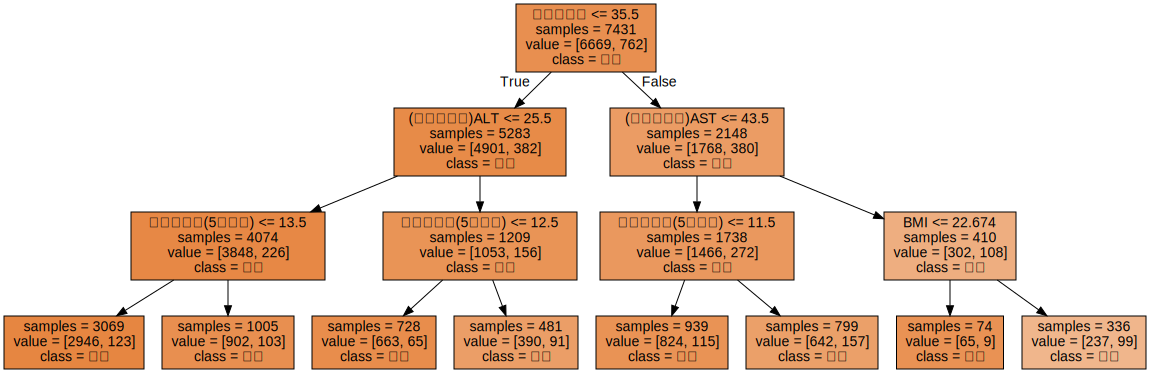

In [43]:
#graphviz 라이브러리를 이용하여 의사결정나무 그리기 
from sklearn.tree import export_graphviz
import graphviz

# filled = True: 색상의 진하기로 클래스를 나타냄, impurity: 불순도 계산값 보여주기 옵션
export_graphviz(tree, out_file="tree.dot", class_names=[ "정상", "당뇨"],
                feature_names=df_dia.columns[1:], impurity=False, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

#### 불균형 데이터 처리
당뇨인 사람과 그렇지 않은 사람의 수가 크게 차이가 나기 때문에 적절한 결과가 나오지 않는다. 이를 해결하기 위해 불균형 데이터 처리가 필요하다.  

In [44]:
tree = DecisionTreeClassifier(class_weight="balanced", max_depth=3, random_state=0)  
tree.fit(X_train, y_train)
print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 0.520
시험용 데이터 정확도: 0.509


In [45]:
tree = DecisionTreeClassifier(class_weight="balanced", max_depth=4, random_state=0)  
tree.fit(X_train, y_train)
print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 0.679
시험용 데이터 정확도: 0.649


In [46]:
tree = DecisionTreeClassifier(class_weight="balanced", max_depth=5, random_state=0)  
tree.fit(X_train, y_train)
print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 0.619
시험용 데이터 정확도: 0.592


시험용 데이터 정확도가 가장 높은 깊이가 3인 의사결정나무를 일단 선택

#### 의사결정나무

In [47]:
tree = DecisionTreeClassifier(class_weight="balanced", max_depth=4, random_state=0)  
tree.fit(X_train, y_train)
print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 0.679
시험용 데이터 정확도: 0.649


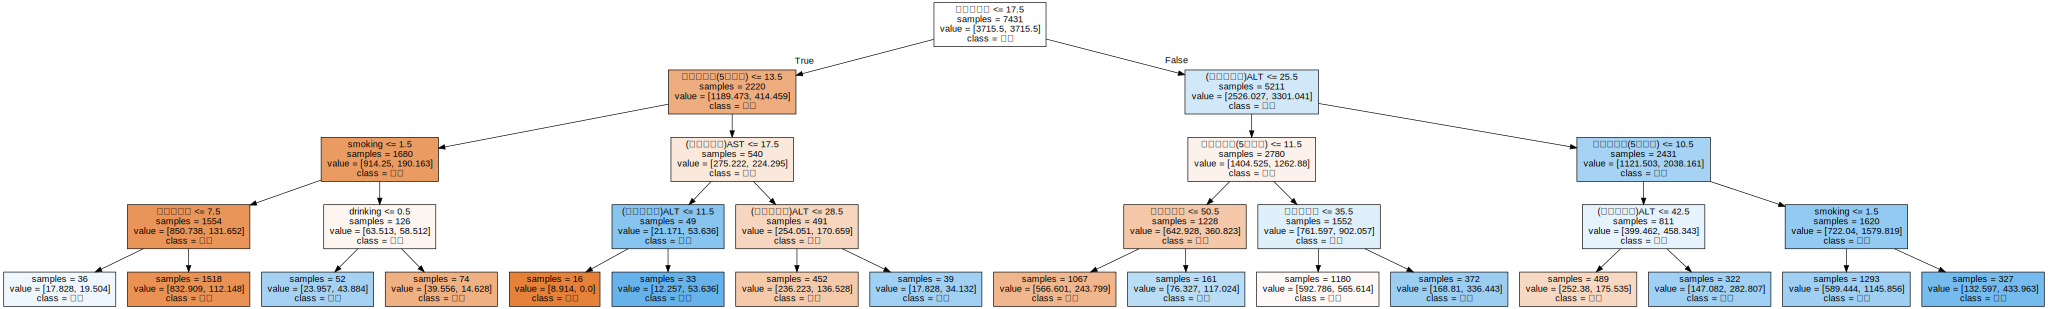

In [48]:
# filled = True: 색상의 진하기로 클래스를 나타냄, impurity: 불순도 계산값 보여주기 옵션
export_graphviz(tree, out_file="tree.dot", class_names=[ "정상", "당뇨"],
                feature_names=df_dia.columns[1:], impurity=False, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

In [49]:
result = tree.feature_importances_
print("변수의 중요도:\n", result)

변수의 중요도:
 [0.         0.20189066 0.         0.02067095 0.21201957 0.49343048
 0.05798712 0.01400123]


In [51]:
import numpy as np

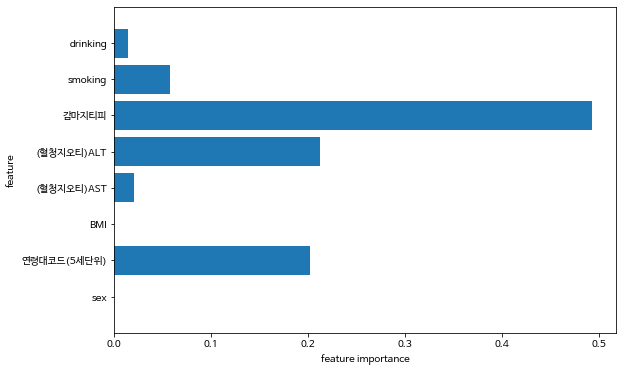

In [52]:
def plot_feature_importances(model):
    plt.rcParams["figure.figsize"] = (9,6)
    n_features = len(df_dia.columns[1:])  # 30개 
    plt.barh(np.arange(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), df_dia.columns[1:])   # 30개의 눈금을 표시하고 눈금 레이블을 변수 이름으로 지정
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features) #Y 축 범위 지정 (-1 ~ 30)

plot_feature_importances(tree)

변수의 중요도
* sex : 0
* 연령대코드(5세단위) : 0.20189066
* BMI : 0.
* (혈청지오티)AST : 0.02067095
* (혈청지오티)ALT : 0.21201957
* 감마지티피 : 0.49343048
* smoking : 0.05798712
* drinking : 0.01400123

**간 상태를 나타내는 지표인 감마지티피, (혈청지오티)ALT의 중요도가 가장 높고, 나이, 흡연상태(smoking), (혈청지오티)AST, 음주 여부(drinking) 순으로 중요도가 높은 것을 확인할 수 있다.**
**시험용 데이터의 정확도가 0.649로 매우 높은 편은 아니지만 간 건강으로 당뇨 여부를 예측할만한 것으로 보인다**

## 앙상블
간 건강으로 당뇨 여부를 더 정확하게 예측할 수 있는 모델을 찾기 위해 앙상블 기법을 이용하기로 한다

### 배깅-랜덤포레스트

In [69]:
from sklearn.ensemble import RandomForestClassifier

# radius_mean, texture_mean 변수만 이용하여 
# 5개의 나무를 만드는 예 (n_estimators = 5, 실제는 수백개의 트리를 만든다)
forest = RandomForestClassifier(class_weight="balanced", n_estimators=5, random_state=2)
forest.fit(X_train.iloc[:, 0:2], y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=5, random_state=2)

In [61]:
print(X)

      sex  연령대코드(5세단위)        BMI  (혈청지오티)AST  (혈청지오티)ALT  감마지티피  smoking  \
0       1            9  22.038567        21.0        27.0   21.0        0   
1       0           13  28.888889        18.0        15.0   15.0        0   
2       0           12  22.892820        27.0        25.0    7.0        0   
3       1           13  27.343750        65.0        97.0   72.0        0   
4       0           12  20.811655        18.0        17.0   14.0        0   
...   ...          ...        ...         ...         ...    ...      ...   
9995    0           13  22.892820        20.0        21.0   20.0        0   
9996    0           11  21.484375        24.0        22.0   21.0        0   
9997    1           12  31.250000        22.0        27.0   35.0        0   
9998    0           15  22.892820        26.0        24.0   21.0        0   
9999    0           13  29.296875        32.0        24.0   30.0        1   

      drinking  
0            0  
1            0  
2            0  
3      

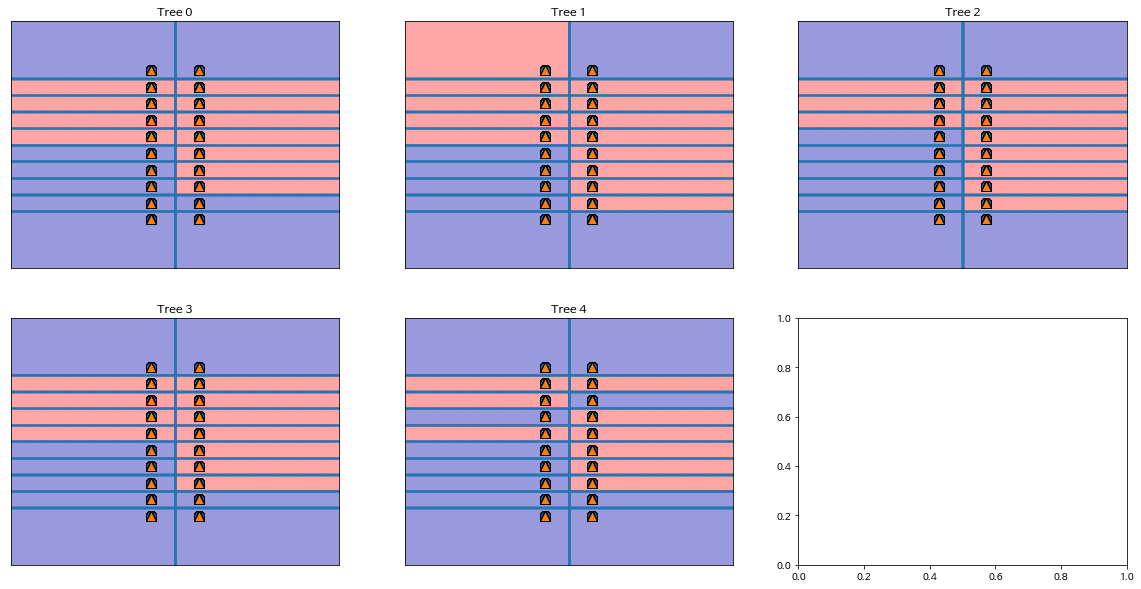

In [70]:
# 5개 나무 각각의 분류 경계를 그림 (서로 모양이 많이 다르다)
# 2차원으로 나무의 결과를 보여주기 위한 코드로 mglearn의 함수들을 이용
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X.iloc[:, 0:2].values, y, tree, ax=ax)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


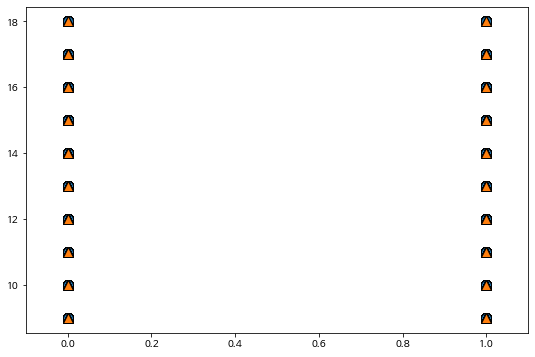

In [71]:
mglearn.plots.plot_2d_separator(forest, X.iloc[:, 0:2].values, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Random forest")
mglearn.discrete_scatter(X.iloc[:, 0], X.iloc[:, 1], y)
plt.show()

In [101]:
# 100개의 나무 생성 (정확도가 높아짐)

forest = RandomForestClassifier(class_weight="balanced", n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

학습용 데이터 세트 정확도: 1.000
시험용 데이터 세트 정확도: 0.877


In [102]:
# 50개의 나무 생성 (정확도가 높아짐)

forest = RandomForestClassifier(class_weight="balanced", n_estimators=50, random_state=0)
forest.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

학습용 데이터 세트 정확도: 0.999
시험용 데이터 세트 정확도: 0.875


In [103]:
# 200개의 나무 생성 (정확도가 높아짐)

forest = RandomForestClassifier(class_weight="balanced", n_estimators=200, random_state=1)
forest.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

학습용 데이터 세트 정확도: 1.000
시험용 데이터 세트 정확도: 0.878


In [104]:
# 500개의 나무 생성 (정확도가 높아짐)

forest = RandomForestClassifier(class_weight="balanced", n_estimators=500, random_state=1)
forest.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

학습용 데이터 세트 정확도: 1.000
시험용 데이터 세트 정확도: 0.878


학습용 데이터 세트 정확도가 1이라서 과적합이 우려됨. 이를 해결하기 위해 나무의 깊이를 제한한다

In [105]:
forest = RandomForestClassifier(class_weight="balanced", n_estimators=100, max_depth = 3, random_state=0)
forest.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

학습용 데이터 세트 정확도: 0.637
시험용 데이터 세트 정확도: 0.611


In [106]:
forest = RandomForestClassifier(class_weight="balanced", n_estimators=300, max_depth = 3, random_state=0)
forest.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

학습용 데이터 세트 정확도: 0.638
시험용 데이터 세트 정확도: 0.617


In [107]:
forest = RandomForestClassifier(class_weight="balanced", n_estimators=100, max_depth = 2, random_state=0)
forest.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

학습용 데이터 세트 정확도: 0.634
시험용 데이터 세트 정확도: 0.611


In [108]:
forest = RandomForestClassifier(class_weight="balanced", n_estimators=100, max_depth = 4, random_state=0)
forest.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

학습용 데이터 세트 정확도: 0.661
시험용 데이터 세트 정확도: 0.633


In [109]:
forest = RandomForestClassifier(class_weight="balanced", n_estimators=100, max_depth = 5, random_state=0)
forest.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

학습용 데이터 세트 정확도: 0.677
시험용 데이터 세트 정확도: 0.647


In [110]:
forest = RandomForestClassifier(class_weight="balanced", n_estimators=300, max_depth = 2, random_state=0)
forest.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

학습용 데이터 세트 정확도: 0.639
시험용 데이터 세트 정확도: 0.617


In [111]:
forest = RandomForestClassifier(class_weight="balanced", n_estimators=500, max_depth = 2, random_state=0)
forest.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

학습용 데이터 세트 정확도: 0.632
시험용 데이터 세트 정확도: 0.610


In [112]:
forest = RandomForestClassifier(class_weight="balanced", n_estimators=100, max_depth = 6, random_state=0)
forest.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

학습용 데이터 세트 정확도: 0.718
시험용 데이터 세트 정확도: 0.666


In [113]:
forest = RandomForestClassifier(class_weight="balanced", n_estimators=100, max_depth = 10, random_state=0)
forest.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

학습용 데이터 세트 정확도: 0.895
시험용 데이터 세트 정확도: 0.795


In [114]:
forest = RandomForestClassifier(class_weight="balanced", n_estimators=500, max_depth = 5, random_state=0)
forest.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

학습용 데이터 세트 정확도: 0.681
시험용 데이터 세트 정확도: 0.651


나무의 깊이를 제한하자 시험용 데이터 세트 정확도가 0.6으로 떨어졌다. 
깊이를 제한하지 않은 경우 과적합이 우려되지만 시험용 데이터 세트 정확도가 훨씬 더 높기 때문에 깊이를 제한하지 않은 모델을 선택하기로 한다

In [116]:
# 200개의 나무 생성하는 경우로 모델을 선택했다. 100개의 나무보다 시험용 데이터 세트 정확도가 높고,  300개의 나무와 동일하기 때문이다

forest = RandomForestClassifier(class_weight="balanced", n_estimators=200, random_state=1)
forest.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

학습용 데이터 세트 정확도: 1.000
시험용 데이터 세트 정확도: 0.878


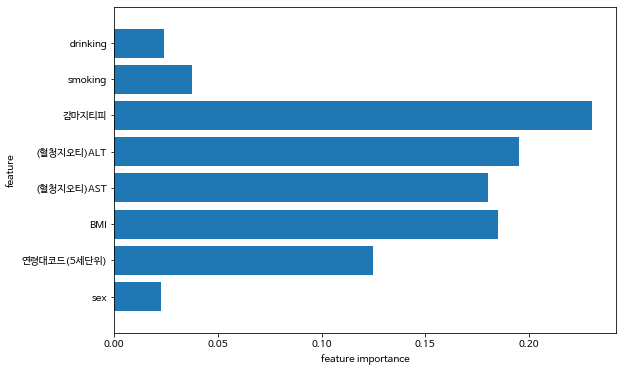

In [117]:
# 단일 의사결정나무의 경우보다 많은 변수(feature)들이 사용됨
plot_feature_importances(forest)

의사결정나무와 비교했을 때, 간 상태를 나타내는 지표인 감마지티피, (혈청지오티)ALT의 중요도가 가장 높은 것은 동일하지만, 세 번째로 중요한 변수는 BMI, 네 번째로 중요한 변수는 (혈청지오티)AST가 되었다. 이를 통해 랜덤포레스트로 당뇨 예측 시 간 건강 관련 변수(감마지티피, (혈청지오티)ALT, (혈청지오티)AST)가 비교적 중요하게 사용된 것을 알 수 있다.  
랜덤포레스트를 사용 할 때 시험용 데이터의 정확도가 의사결정나무의 시험용 데이터의 정확도인 0.649에서 0.878로 더 높아졌음을 확인할 수 있다.  
랜덤포레스트를 통해 간 건강으로 당뇨 여부를 예측할 수 있다는 것이 조금 더 확실해졌다.

### 부스팅-그래디언트부스팅

In [75]:
from sklearn.ensemble import GradientBoostingClassifier
# 기본값은 max_depth= 3, n_estimators=100, learning_rate = 0.1

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

In [118]:
print("학습용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습용 데이터 세트 정확도: 0.903
시험용 데이터 세트 정확도: 0.879


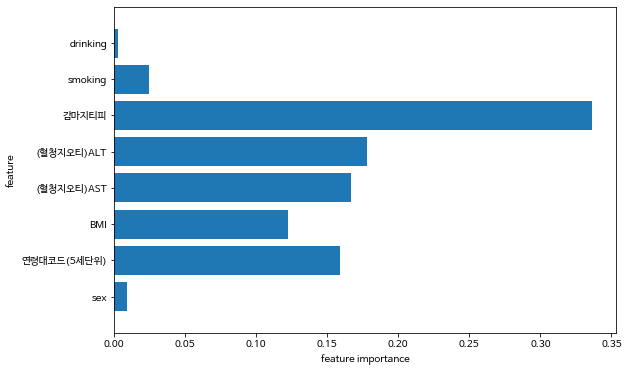

In [119]:
plot_feature_importances(gbrt)

간 상태를 나타내는 지표인 감마지티피, (혈청지오티)ALT, (혈청지오티)AST가 가장 중요한 지표로 선택되었다. 이를 통해 그레디언트 부스팅으로 당뇨 예측 시 간 건강 관련 변수가 의사결정나무보다 더 중요하게 사용된 것을 알 수 있고, 시험용 데이터의 정확도가 0.649에서 0.879로 더 높아졌음을 확인할 수 있다.
그레디언트부스팅을 통해 간 건강으로 당뇨 여부를 예측할 수 있다는 것이 더 확실해졌다.

## 모델 평가

In [121]:
from sklearn.model_selection import cross_val_score

# 교차 검증을 10번 수행하여 10번의 교차 검증 평균 정확도를 비교 (10-fold cross validation)
# default cv=5

dt_scores = cross_val_score(tree, X_train, y_train, cv=10, scoring='accuracy')  
rf_scores = cross_val_score(forest, X_train, y_train, cv=10, scoring='accuracy')
gbrt_scores = cross_val_score(gbrt, X_train, y_train, cv=10, scoring='accuracy')

print("Accuracy")
print("Decision tree: ", dt_scores) 
print("Random forest: ", rf_scores) 
print("Gradient boosting: ", gbrt_scores) 

print("Accuracy mean")
print("Decision tree :{:.3f}".format(dt_scores.mean())) 
print("Random forest :{:.3f}".format(rf_scores.mean())) 
print("Gradient boosting :{:.3f}".format(gbrt_scores.mean())) 

Accuracy
Decision tree:  [0.83064516 0.82503365 0.84118439 0.82099596 0.82234186 0.82637954
 0.81830417 0.82772544 0.8371467  0.81965007]
Random forest:  [0.89112903 0.89636608 0.89636608 0.89502019 0.89636608 0.89502019
 0.89636608 0.89636608 0.89636608 0.89771198]
Gradient boosting:  [0.89247312 0.89502019 0.89771198 0.89367429 0.89905787 0.89905787
 0.90174966 0.8923284  0.89367429 0.89502019]
Accuracy mean
Decision tree :0.827
Random forest :0.896
Gradient boosting :0.896


K-fold 교차검증 결과 평균적인 정확도는 랜덤 포레스트와 그레디언트부스팅, 마지막으로 의사결정나무 순서대로 정확도가 좋다

In [100]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2,3,4,5,6], 'max_features':[2,3,4,5,6,7,8]}

In [123]:
rf_tree = RandomForestClassifier(class_weight="balanced", n_estimators = 100, random_state=0)
grid = GridSearchCV(rf_tree, param_grid = parameters, cv=10, n_jobs=-1)
print(grid)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6],
                         'max_features': [2, 3, 4, 5, 6, 7, 8]})


In [124]:
grid.fit(X_train, y_train)
print('GridSearchCV 최적 파라미터 :', grid.best_params_)
print('GridSearchCV 최고 정확도 : {0:.4f}'.format(grid.best_score_))

GridSearchCV 최적 파라미터 : {'max_depth': 6, 'max_features': 2}
GridSearchCV 최고 정확도 : 0.6978


아마 교차 검증 시에는 당뇨병 환자의 비율이 포함되지 않아서 정확도가 더 높게 나왔을 것 같다

In [ ]:
#비율을 포함하지 않는 경우

In [129]:
rf_tree_no_balance = RandomForestClassifier(n_estimators = 100, random_state=0)
grid = GridSearchCV(rf_tree_no_balance, param_grid = parameters, cv=10, n_jobs=-1)
print(grid)
grid.fit(X_train, y_train)
print('GridSearchCV 최적 파라미터 :', grid.best_params_)
print('GridSearchCV 최고 정확도 : {0:.4f}'.format(grid.best_score_))

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6],
                         'max_features': [2, 3, 4, 5, 6, 7, 8]})
GridSearchCV 최적 파라미터 : {'max_depth': 6, 'max_features': 6}
GridSearchCV 최고 정확도 : 0.8975


그레디언트부스팅의 그리드 서치

In [125]:
# 파라미터를 dictionary 형태로 설정
parameters_boosting = {'max_depth':[1,2,3], 'learning_rate':[0.1,0.08, 0.06, 0.04, 0.02]}

In [126]:
# param_grid의 파라미터들을 3개의 fold 로 나누어 검증
# refit=True (기본값): 가장 좋은 파라미터 설정으로 재학습  
init_gbrt = GradientBoostingClassifier(random_state=0)
grid_gbrt = GridSearchCV(init_gbrt, param_grid=parameters_boosting, cv=3, refit=True)
print(grid_gbrt)
# 파라미터들을 순차적으로 학습, 검증
grid_gbrt.fit(X_train, y_train)

# GridSearchCV 결과 추출하여 DataFrame으로 변환
scores_df = pd.DataFrame(grid_gbrt.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score']]

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=0),
             param_grid={'learning_rate': [0.1, 0.08, 0.06, 0.04, 0.02],
                         'max_depth': [1, 2, 3]})


,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'learning_rate': 0.1, 'max_depth': 1}",0.897187,7,0.897457,0.896649,0.897457
1,"{'learning_rate': 0.1, 'max_depth': 2}",0.895707,13,0.896649,0.895438,0.895034
2,"{'learning_rate': 0.1, 'max_depth': 3}",0.895303,15,0.898668,0.894227,0.893016
3,"{'learning_rate': 0.08, 'max_depth': 1}",0.897457,1,0.897457,0.897457,0.897457
4,"{'learning_rate': 0.08, 'max_depth': 2}",0.895707,14,0.896245,0.895842,0.895034
5,"{'learning_rate': 0.08, 'max_depth': 3}",0.895842,12,0.896649,0.895438,0.895438
6,"{'learning_rate': 0.06, 'max_depth': 1}",0.897322,5,0.897457,0.897053,0.897457
7,"{'learning_rate': 0.06, 'max_depth': 2}",0.896649,9,0.897457,0.895842,0.896649
8,"{'learning_rate': 0.06, 'max_depth': 3}",0.895976,11,0.896245,0.895842,0.895842
9,"{'learning_rate': 0.04, 'max_depth': 1}",0.897457,1,0.897457,0.897457,0.897457


In [127]:
print('GridSearchCV 최적 파라미터:', grid_gbrt.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_gbrt.best_score_))

GridSearchCV 최적 파라미터: {'learning_rate': 0.08, 'max_depth': 1}
GridSearchCV 최고 정확도: 0.8975


In [128]:
# 최적 파라미터로 학습이 된 모델을 이용하여 시험용 데이터 세트 분류
print("시험용 데이터 세트 정확도: {:.3f}".format(grid_gbrt.score(X_test, y_test)))

시험용 데이터 세트 정확도: 0.880


###모델 평가-AUC
민감도와 특이도로 측정하는 모델의 정확도
AUC값이 클수록 좋은 모델이라고 할 수 있음

In [154]:
auc_dt = roc_auc_score(y_test, tree.predict_proba(X_test.iloc[:, 0:2])[:, 1])
auc_rf = roc_auc_score(y_test, forest.predict_proba(X_test)[:, 1])
auc_gbrt = roc_auc_score(y_test, grid_gbrt.predict_proba(X_test)[:, 1])
print("Decision Tree의 AUC: {:.3f}".format(auc_dt))
print("Random Forest의 AUC: {:.3f}".format(auc_rf))
print("Gradient Boosting의 AUC: {:.3f}".format(auc_gbrt)) ## AUC 면적이 가장 큰 모델

Decision Tree의 AUC: 0.670
Random Forest의 AUC: 0.663
Gradient Boosting의 AUC: 0.707


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


##결론

간 건강을 나타내는 지표, (혈청지오티)AST, (혈청지오티)ALT, 감마지티피를 바탕으로 당뇨병 여부를 예측할 수 있는 세 가지 모델을 만들었다. 당뇨를 예측하기 위해 도움이 될 수 있을만한 추가적인 독립변수, 성별, 연령대, BMI, 흡연상태, 음주 여부를 포함했다.  


* (혈청지오티)AST : 간 기능을 나타내는 혈액검사상의 수치, 간, 심장 등의 세포가 손상을 받는 경우 농도가 증가함  
* (혈청지오티)ALT : 간 기능을 나타내는 혈액검사상의 수치, ALT는 주로 간세포 안에 존재하는 효소로, 간세포가 손상 받는 경우 농도가 증가함
* 감마지티피 : 간 기능을 나타내는 혈액검사상의 수치, 간세포 장애 발생 시 혈중에 증가하게 됨


의사결정나무, 랜덤포레스트, 그래디언트부스팅 중 그래디언트 부스팅의 정확도가 제일 높았다.(AUC : 그래디언트부스팅0.707 > 의사결정나무0.670 > 랜덤포레스트0.663)


간 건강을 나타내는 지표로 당뇨를 예측하기 원했던 만큼 생성한 모델의 결과, 가장 중요하게 사용된 지표가 간 건강을 나타내는 지표 중에 있길 바랬고, 대부분의 모델에서 제일 중요한 두 지표가 감마지티피, ALT라는 점에서 간 건강을 통해 당뇨병을 예측할 수 있다는 것을 알 수 있었다.  
**특히 가장 정확도 높은 예측이 가능한 모델인 그레디언트부스팅의 제일 중요한 세 지표가 모두 간 건강을 나타내는 지표인 (혈청지오티)AST, (혈청지오티)ALT, 감마지티피이기 때문에 이 모델을 활용하여 당뇨병 여부를 예측할 수 있다는 것을 알 수 있다.**  
또, 의외로 모든 모델에서 흡연과 음주의 중요도가 상대적으로 낮았는데, 당뇨에 영향을 미치지 않는다는 것은 아니지만, 이 두가지가 당뇨에 미치는 영향이 크지 않다는 것을 알 수 있다.

이는 당뇨병에 걸리는 것에 있어 간 건강이 영향을 미칠 수도 있다는 것을 의미할 수 있다고 본다. 따라서 당뇨를 예방하기 위해 공복혈당만 신경써야 하는 것이 아니라 간 건강도 함께 관리해야 할 것이다.